In [1]:
from sklearn.preprocessing import StandardScaler
from pycaret.regression import *
import pandas as pd
import numpy as np

In [2]:
ver1 = pd.read_csv('0918_eda_one_hot.csv').drop(['STRG_DT'], axis=1)
ver1_cont = ver1.drop(['cluster_1', 'cluster_2', 'cluster_3'], axis=1)
ver1_cat = ver1[['cluster_1', 'cluster_2', 'cluster_3']]

y_val = np.array(ver1_cont.iloc[:, 0]).reshape(-1, 1)
x_val = ver1_cont.drop(['FRST_TREE_CNT'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

x_train_val, x_test_val = train_test_split(x_val, test_size= 0.2, shuffle = False)
y_train_val, y_test_val = train_test_split(y_val, test_size= 0.2, shuffle = False)

train_cat, test_cat = train_test_split(ver1_cat, test_size= 0.2, shuffle = False)
test_cat = test_cat.reset_index().drop(['index'], axis=1)

In [4]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_val)
y_test_scaled = y_scaler.transform(y_test_val)

x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train_val)
x_test_scaled = x_scaler.transform(x_test_val)

In [5]:
y_train_df = pd.DataFrame(y_train_scaled, columns = ['FRST_TREE_CNT'])
x_train_df = pd.DataFrame(x_train_scaled, columns = x_val.columns)

y_test_df = pd.DataFrame(y_test_scaled, columns = ['FRST_TREE_CNT'])
x_test_df = pd.DataFrame(x_test_scaled, columns = x_val.columns)

In [6]:
train_df = pd.concat([y_train_df, x_train_df, train_cat], axis=1)
test_df = pd.concat([y_test_df, x_test_df, test_cat], axis=1)

In [7]:
df1 = pd.concat([train_df, test_df]).reset_index().drop(['index'], axis=1)

In [8]:
df1

,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3
0,-0.102251,-0.043934,0.858048,-0.293285,-3.266703,0.190960,-0.672832,-0.075804,1,0,0
1,-0.102251,-0.010636,1.737274,-0.293285,-3.220612,0.190960,-0.672832,-0.075804,1,0,0
2,-0.102251,0.089257,1.417556,-0.293285,-3.189884,0.065110,-0.672832,-0.075804,1,0,0
3,-0.102251,0.067058,1.257696,-0.293285,-3.205248,0.149010,-0.672832,-0.075804,1,0,0
4,-0.102251,0.078158,1.231053,-0.293285,-3.251339,0.407701,-0.672832,-0.075804,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
26059,-2.324533,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1
26060,-2.324533,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1
26061,-2.324533,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1
26062,-2.324533,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1


In [9]:
#Setup 설정
model1 = setup(df1, target = 'FRST_TREE_CNT', train_size = 0.8, data_split_shuffle = False)

,Description,Value
0,Session id,8825
1,Target,FRST_TREE_CNT
2,Target type,Regression
3,Original data shape,"(26064, 11)"
4,Transformed data shape,"(26064, 11)"
5,Transformed train set shape,"(20851, 11)"
6,Transformed test set shape,"(5213, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [57]:
comp1 = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6382,0.6476,0.7251,-7.9735,0.3826,2.4481,0.6080
huber,Huber Regressor,0.6676,0.7553,0.7651,-10.3300,0.3787,2.4845,0.0840
gbr,Gradient Boosting Regressor,0.6705,0.7240,0.7714,-8.2902,0.3794,2.4413,0.9660
catboost,CatBoost Regressor,0.6834,0.7547,0.7844,-8.7098,0.4055,2.6440,4.0600
lar,Least Angle Regression,0.6874,0.7707,0.7894,-9.9797,0.3841,2.4734,0.0290
lr,Linear Regression,0.6874,0.7707,0.7894,-9.9802,0.3841,2.4734,0.0250
ridge,Ridge Regression,0.6875,0.7711,0.7895,-9.9806,0.3842,2.4731,0.0230
br,Bayesian Ridge,0.6879,0.7722,0.7899,-9.9941,0.3844,2.4734,0.0270
ada,AdaBoost Regressor,0.6856,0.8650,0.7937,-9.4026,0.3675,2.2670,0.2980
lightgbm,Light Gradient Boosting Machine,0.6929,0.7936,0.8018,-9.7463,0.4218,2.6864,0.2090


<br/> Extra Tree Regressor

In [58]:
et_model = create_model('et', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.1792,0.0519,0.2277,-1.1893,0.0700,0.0752


In [59]:
et_tuned = tune_model(et_model, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4936,0.2784,0.5277,-8.0970,0.3381,5.3755
1,0.5375,0.3908,0.6251,-3.1066,0.3422,4.2999
2,0.6251,0.4776,0.6911,-4.6932,0.3826,0.5245
3,0.7466,0.8616,0.9282,-1.8249,0.4599,0.4978
4,0.9579,1.2160,1.1027,-17.3998,0.5063,0.8147
5,0.3842,0.2371,0.4869,-0.0582,0.3184,0.9325
6,0.1731,0.0566,0.2379,-1.7463,0.1550,0.5374
7,0.2412,0.0715,0.2675,-0.2276,0.2038,1.9939
8,0.4373,0.3536,0.5946,-0.8911,0.3270,0.5706


[I 2023-09-24 21:51:49,267] Searching the best hyperparameters using 20851 samples...
[I 2023-09-24 23:00:24,088] Finished hyperparameter search!


In [60]:
et_final = finalize_model(et_tuned)

In [61]:
predict_model(et_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1362,0.0253,0.1591,-0.0686,0.0484,0.0600


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.317674
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.317674
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.317674
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.317674
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.317674
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.317674
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.317674
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.317674
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.317674


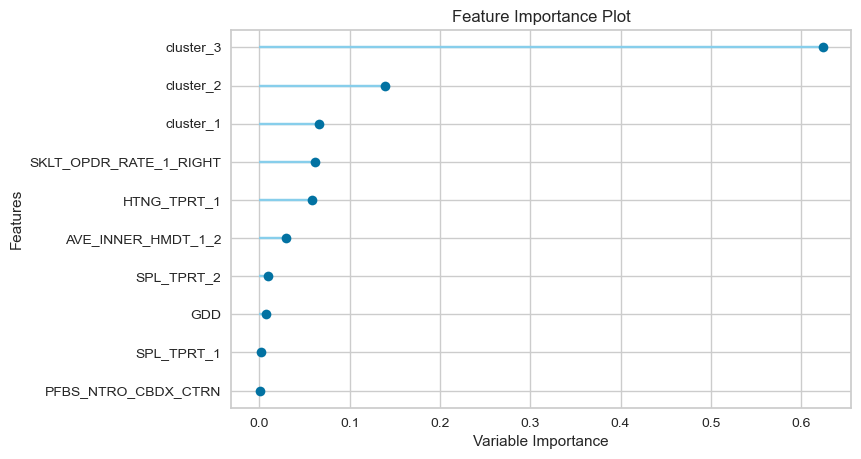

In [62]:
plot_model(et_final, plot='feature')

In [63]:
save_model(et_final, 'Extra_Tree_EDA_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(criterion='absolute_error', max_depth=6,
                                      max_features=0.47650782017197835,
                                      min_imp

In [64]:
Extra_Tree_EDA_KF = load_model('Extra_Tree_EDA_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Gradient Boosting Regressor

In [10]:
gbr_model = create_model('gbr', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.2420,0.1048,0.3238,-3.4254,0.1040,0.1024


In [11]:
gbr_tuned = tune_model(gbr_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4754,0.2872,0.5359,-8.3828,0.3396,5.0272
1,0.6982,0.7016,0.8376,-6.3729,0.4511,5.6682
2,0.5844,0.4627,0.6802,-4.5153,0.3917,0.5207
3,0.6362,0.5379,0.7334,-0.7636,0.3460,0.5039
4,0.8858,1.0474,1.0234,-14.8489,0.4862,0.8226
5,0.5541,0.4327,0.6578,-0.9311,0.3243,2.3433
6,0.3452,0.1951,0.4417,-8.4703,0.2160,1.2352
7,0.2967,0.1269,0.3562,-1.1778,0.2687,5.2989
8,0.3953,0.2118,0.4602,-0.1326,0.2562,0.9385


[I 2023-09-25 00:35:51,096] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 00:53:41,187] Finished hyperparameter search!


In [12]:
gbr_final = finalize_model(gbr_tuned)

In [13]:
predict_model(gbr_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0655,0.0066,0.0812,0.7214,0.0247,0.0286


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.191741
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.191741
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.192501
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.191679
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.194575
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.297006
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.308636
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.308636
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.308641


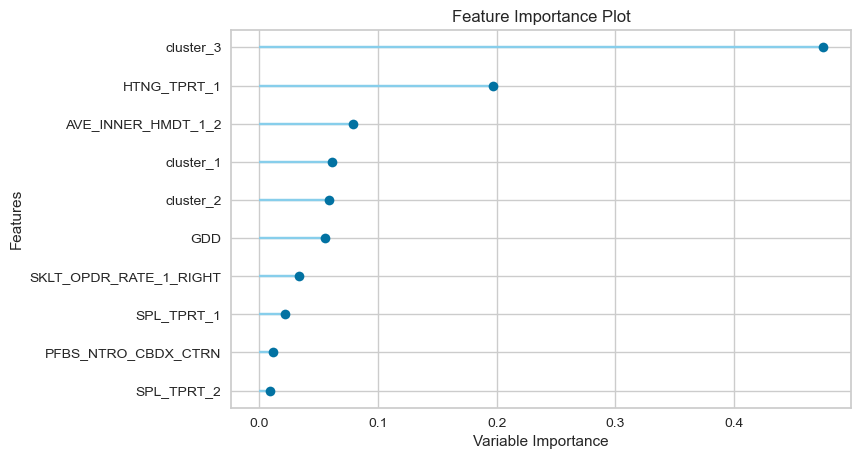

In [14]:
plot_model(gbr_final, plot='feature')

In [15]:
save_model(gbr_final, 'Gradient_Boosting_EDA_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.06487783991486105,
                                            max_depth=4,
                                            max_features=0.5

In [16]:
Gradient_Boosting_EDA_KF = load_model('Gradient_Boosting_EDA_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Huber Regressor

In [24]:
hb_model = create_model('huber', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3671,0.1776,0.4214,-6.4960,0.1346,0.1551


In [25]:
hb_tuned = tune_model(hb_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0838,1.3427,1.1588,-42.8678,0.6621,11.4920
1,0.8240,0.7939,0.8910,-7.3432,0.4806,5.8910
2,0.5496,0.3593,0.5995,-3.2838,0.3239,0.4779
3,0.6951,0.7562,0.8696,-1.4792,0.4233,0.4625
4,1.0306,1.5305,1.2371,-22.1587,0.4031,0.8970
5,0.3908,0.2600,0.5099,-0.1603,0.3308,0.9123
6,0.1410,0.0411,0.2028,-0.9954,0.1497,0.4291
7,0.2144,0.0564,0.2374,0.0329,0.1841,2.3035
8,0.4311,0.2842,0.5331,-0.5199,0.2756,0.8718


[I 2023-09-25 01:15:32,124] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 01:16:55,211] Finished hyperparameter search!


In [26]:
hb_final = finalize_model(hb_tuned)

In [27]:
predict_model(hb_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.1499,0.0298,0.1727,-0.2582,0.0524,0.0651


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.333325
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.330535
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.328980
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.327228
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.325161
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.301564
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.301445
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.303403
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.303411


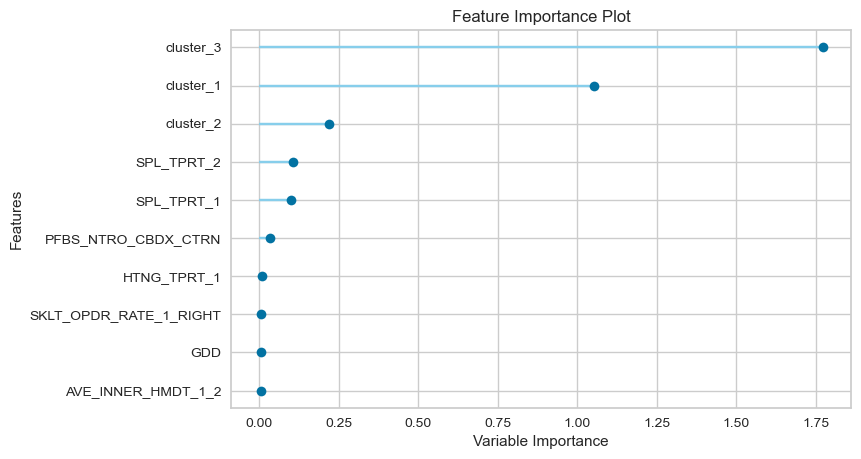

In [28]:
plot_model(hb_final, plot='feature')

In [29]:
save_model(hb_final, 'Huber_EDA_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  HuberRegressor(alpha=0.6013023152542936,
                                 epsilon=1.0176515245362279))]),
 'Huber_EDA_KF.pkl')

In [30]:
Huber_EDA_KF = load_model('Huber_EDA_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Cat Boost Regressor

In [17]:
cb_model = create_model('catboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.2843,0.1469,0.3833,-5.2007,0.1258,0.1205


In [18]:
cb_tuned = tune_model(cb_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3669,0.2265,0.4759,-6.4000,0.2840,3.6868
1,0.7612,0.8107,0.9004,-7.5195,0.4797,6.0101
2,0.5748,0.4283,0.6545,-4.1061,0.3728,0.5268
3,0.6952,0.6875,0.8292,-1.2540,0.4201,0.5408
4,0.8720,1.0393,1.0195,-14.7266,0.4713,0.8069
5,0.6472,0.5747,0.7581,-1.5646,0.3163,2.6727
6,0.3581,0.2100,0.4582,-9.1905,0.2020,1.2778
7,0.3269,0.1635,0.4044,-1.8063,0.2987,5.9709
8,0.4278,0.2300,0.4796,-0.2304,0.2589,1.1887


[I 2023-09-25 00:59:43,074] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 01:10:43,035] Finished hyperparameter search!


In [19]:
cb_final = finalize_model(cb_tuned)

In [20]:
predict_model(cb_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0701,0.0080,0.0896,0.6611,0.0271,0.0305


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.193082
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.198266
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.202545
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.206872
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.202545
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.346216
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.346216
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.340837
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.339320


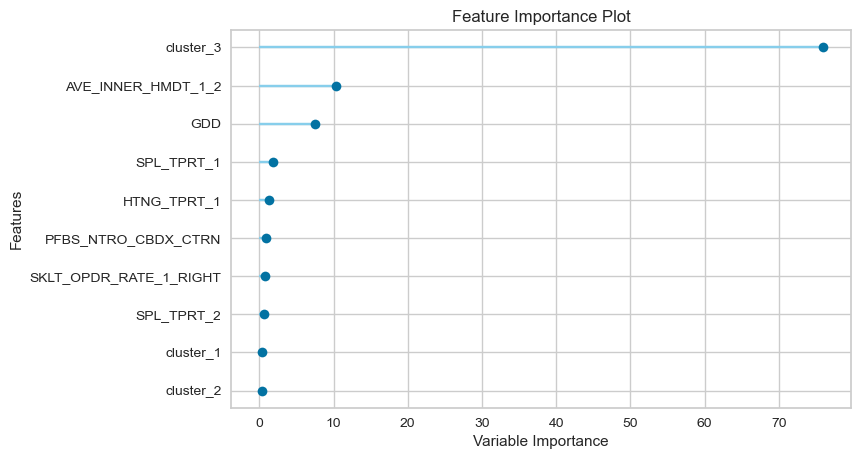

In [21]:
plot_model(cb_final, plot='feature')

In [22]:
save_model(cb_final, 'Cat_Boost_EDA_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  <catboost.core.CatBoostRegressor object at 0x000001B1D5E9C970>)]),
 'Cat_Boost_EDA_KF.pkl')

In [23]:
Cat_Boost_EDA_KF = load_model('Cat_Boost_EDA_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Least Angle Regressior

In [31]:
lar_model = create_model('lar', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.5453,0.3492,0.5909,-13.7377,0.1962,0.2328


In [32]:
lar_tuned = tune_model(lar_model, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0074,1.1284,1.0623,-35.8648,0.6259,10.7763
1,0.7374,0.6654,0.8157,-5.9927,0.4447,5.5293
2,0.4683,0.2481,0.4981,-1.9575,0.2622,0.4325
3,0.6187,0.5941,0.7708,-0.9478,0.3594,0.4141
4,1.0481,1.5891,1.2606,-23.0448,0.3792,0.9238
5,0.6109,0.4786,0.6918,-1.1358,0.3486,2.0440
6,0.2425,0.0848,0.2912,-3.1156,0.2021,0.8167
7,0.2636,0.1100,0.3317,-0.8877,0.2032,2.3669
8,0.4564,0.3745,0.6120,-1.0032,0.3087,0.7782


[I 2023-09-25 01:24:05,204] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 01:24:25,992] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
lar_final = finalize_model(lar_tuned)

In [36]:
predict_model(lar_final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,0.1856,0.0490,0.2213,-1.0674,0.0675,0.0785


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.268233
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.263144
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.258615
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.257634
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.253111
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.220115
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.220035
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.224053
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.226600


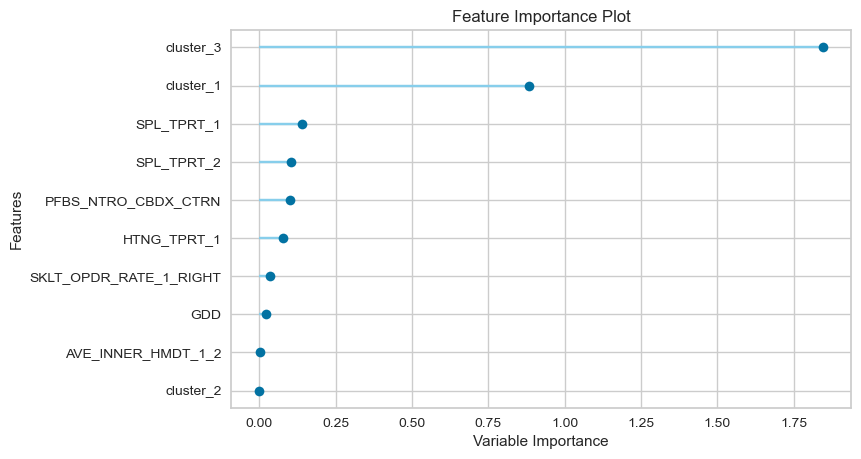

In [38]:
plot_model(lar_final, plot='feature')

In [39]:
save_model(lar_final, 'LAR_EDA_KF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', Lars(random_state=8825))]),
 'LAR_EDA_KF.pkl')

In [40]:
LAR_EDA_KF = load_model('LAR_EDA_KF', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


<br/> Model Ensemble 1

In [41]:
Blend1_EDA_KF = blend_models([Gradient_Boosting_EDA_KF, Cat_Boost_EDA_KF], choose_better=True, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3977,0.2334,0.4832,-6.6265,0.2990,4.0927
1,0.7271,0.7507,0.8665,-6.8893,0.4646,5.8340
2,0.5774,0.4424,0.6652,-4.2742,0.3807,0.5205
3,0.6653,0.6055,0.7781,-0.9850,0.3786,0.5217
4,0.8768,1.0388,1.0192,-14.7191,0.4788,0.8131
5,0.5979,0.4940,0.7029,-1.2046,0.3126,2.4930
6,0.3451,0.1976,0.4445,-8.5895,0.2065,1.2290
7,0.3108,0.1421,0.3770,-1.4386,0.2818,5.6282
8,0.4105,0.2159,0.4647,-0.1550,0.2528,1.0581


Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [43]:
Blend1_tuned = tune_model(Blend1_EDA_KF, search_library = 'optuna', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4945,0.3072,0.5542,-9.0353,0.3555,5.2739
1,0.6798,0.6655,0.8158,-5.9937,0.4397,5.5061
2,0.6066,0.4883,0.6988,-4.8209,0.4033,0.5409
3,0.5767,0.4650,0.6819,-0.5244,0.3183,0.4529
4,0.9340,1.1351,1.0654,-16.1760,0.4819,0.8670
5,0.4934,0.3420,0.5848,-0.5264,0.3430,2.0736
6,0.3340,0.1814,0.4259,-7.8028,0.2269,1.2027
7,0.3045,0.1321,0.3634,-1.2664,0.2674,4.6866
8,0.3893,0.2017,0.4491,-0.0788,0.2492,0.9696


[I 2023-09-25 01:31:48,560] Searching the best hyperparameters using 20851 samples...
[I 2023-09-25 01:44:48,676] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
EDA_KF_ENS1 = finalize_model(Blend1_tuned)

In [45]:
predict_model(EDA_KF_ENS1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0655,0.0066,0.0812,0.7214,0.0247,0.0286


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.191741
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.191741
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.192501
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.191679
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.194575
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.297006
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.308636
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.308636
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.308641


In [46]:
save_model(EDA_KF_ENS1, 'EDA_KF_ENS1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PFBS_NTRO_CBDX_CTRN',
                                              'SPL_TPRT_1', 'HTNG_TPRT_1',
                                              'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
                                              'SKLT_OPDR_RATE_1_RIGHT', 'GDD',
                                              'cluster_1', 'cluster_2',
                                              'cluster_3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(learning_rate=0.06487783991486105,
                                            max_depth=4,
                                            max_features=0.5

In [47]:
EDA_KF_ENS1 = load_model('UMAP_KF_ENS1', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded
